In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [60]:
df = pd.read_csv(r'C:\Users\admin\Documents\becode_projects\second_df.csv')
del df['Unnamed: 0']
df = df.dropna(subset=['bathroom_count'])
df = df.dropna(subset=['bedroom_count'])
df = df.dropna(subset=['construction_year'])
df = df.dropna(subset=['district'])
df["garden"].fillna(0, inplace = True)
del df['flooding_zone']
del df['garden_area']
del df['number_of_facades']
del df['subtype_of_property']
del df['room_count']
del df['district']
del df['locality']
del df['type_of_sale']
del df['construction_year']
del df['type_of_property']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104396 entries, 0 to 104395
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bathroom_count        104396 non-null  int64  
 1   bedroom_count         104396 non-null  int64  
 2   garden                104396 non-null  float64
 3   kitchen               57594 non-null   object 
 4   living_area           104396 non-null  float64
 5   price                 104396 non-null  int64  
 6   surface_of_plot       104396 non-null  float64
 7   swimming_pool         104396 non-null  float64
 8   terrace               104396 non-null  float64
 9   PEB_grade             104396 non-null  int64  
 10  Building_state_grade  104396 non-null  int64  
 11  pricesqm              104396 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 9.6+ MB


In [61]:
kitchen_grade = {'USA_HYPER_EQUIPPED': 8,
 'USA_SEMI_EQUIPPED': 7,
 'USA_INSTALLED': 6,
 'HYPER_EQUIPPED': 5,
 'SEMI_EQUIPPED': 4,
 'INSTALLED': 3,
 'USA_UNINSTALLED': 2,
 'NOT_INSTALLED': 1}
df['kitchen_grade'] = df['kitchen'].map(kitchen_grade)

del df['kitchen']

df.to_csv("kitchen_data.csv", index = True)

In [62]:
df["kitchen_grade"].fillna(0, inplace = True)

In [63]:
X = df.drop(columns=["price"]).to_numpy()
y = df.price.to_numpy().reshape(-1 , 1)

In [64]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (104396, 11)
y shape:  (104396, 1)


In [65]:
df.corr()

,bathroom_count,bedroom_count,garden,living_area,price,surface_of_plot,swimming_pool,terrace,PEB_grade,Building_state_grade,pricesqm,kitchen_grade
bathroom_count,1.000000,0.328871,0.075129,0.354800,0.362041,0.003483,0.124988,0.067040,-0.004036,0.050589,0.082427,0.102338
bedroom_count,0.328871,1.000000,0.148157,0.514727,0.317530,0.003647,0.102085,-0.009267,-0.100020,-0.046478,-0.063421,0.028672
garden,0.075129,0.148157,1.000000,0.160840,0.041848,0.006548,0.068840,0.135637,-0.097012,-0.004827,-0.089469,0.107857
living_area,0.354800,0.514727,0.160840,1.000000,0.478909,0.014165,0.218513,-0.034964,-0.111401,-0.030370,-0.056982,0.027894
price,0.362041,0.317530,0.041848,0.478909,1.000000,0.010456,0.227206,0.043389,0.103774,0.146345,0.287854,0.096995
surface_of_plot,0.003483,0.003647,0.006548,0.014165,0.010456,1.000000,0.024088,0.002421,-0.000254,-0.000428,0.000695,-0.001532
swimming_pool,0.124988,0.102085,0.068840,0.218513,0.227206,0.024088,1.000000,0.067486,0.013568,0.077974,-0.001261,0.074187
terrace,0.067040,-0.009267,0.135637,-0.034964,0.043389,0.002421,0.067486,1.000000,0.119752,0.102786,0.008718,0.209066
PEB_grade,-0.004036,-0.100020,-0.097012,-0.111401,0.103774,-0.000254,0.013568,0.119752,1.000000,0.389012,0.056669,0.045160
Building_state_grade,0.050589,-0.046478,-0.004827,-0.030370,0.146345,-0.000428,0.077974,0.102786,0.389012,1.000000,0.080988,0.141265


c:\Users\admin\anaconda3\Lib\site-packages\seaborn\matrix.py:250: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


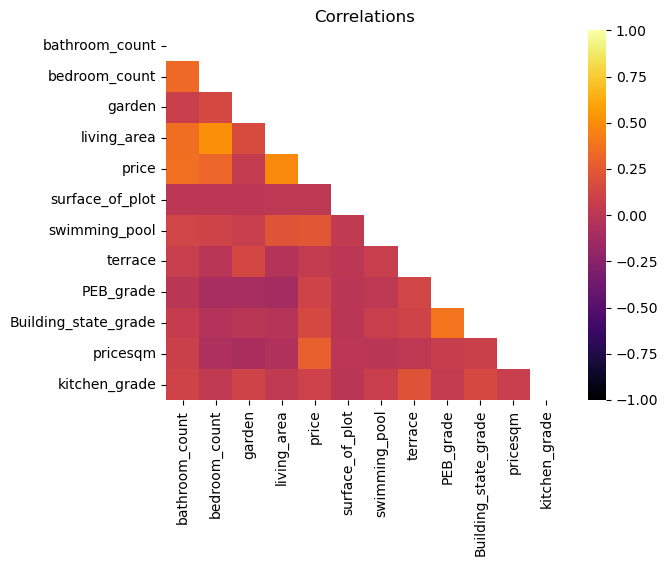

In [66]:

corr_matrix = df.corr()
corr_matrix_np = corr_matrix.values
np.fill_diagonal(corr_matrix_np, 1)
corr_matrix = pd.DataFrame(corr_matrix_np, index=corr_matrix.index, columns=corr_matrix.columns)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="inferno", vmax=1, vmin=-1, fmt='.1f')
plt.title("Correlations")
plt.show()

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (83516, 11)
Shape of X_test:  (20880, 11)
Shape of y_train:  (83516, 1)
Shape of y_test:  (20880, 1)


In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = LinearRegression() # Instatiate LinearREgression object
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

In [70]:
regressor.coef_


array([[ 5.52650756e+04,  2.17795411e+04, -2.20372032e+04,
         1.66537478e+03,  1.48551545e-03,  3.26014529e+05,
         1.36845483e+04,  2.68368419e+04,  2.92870343e+04,
         2.14199976e+02,  5.16349479e+03]])

In [71]:
regressor.intercept_

array([-764240.55246964])

In [72]:
y_pred = regressor.predict(X_test)
y_pred

array([[863915.21510472],
       [ 65282.68480879],
       [289253.94294426],
       ...,
       [222356.38739891],
       [680942.25821242],
       [379584.98061476]])

In [73]:
residuals = y_test - y_pred
residuals

array([[-183915.21510472],
       [  60967.31519121],
       [ 130746.05705574],
       ...,
       [  30643.61260109],
       [-135942.25821242],
       [-184584.98061476]])

In [74]:
score = r2_score(y_test, y_pred)
score

0.42838262394036963

148592.95746942572

In [75]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

148592.95746942572
